# Iris (keras regression)

In [2]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from numpy import argmax, asmatrix

### Càrrega de dades

In [4]:
dt = pd.read_csv('data/iris.data.txt')

### Validació simple

In [5]:
dt = dt.drop('class',axis=1)

In [6]:
dt.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
X = dt.iloc[:,:-1]
y  = dt.iloc[:,-1]
X, y

(     sepal-length  sepal-width  petal-length
 0             5.1          3.5           1.4
 1             4.9          3.0           1.4
 2             4.7          3.2           1.3
 3             4.6          3.1           1.5
 4             5.0          3.6           1.4
 ..            ...          ...           ...
 145           6.7          3.0           5.2
 146           6.3          2.5           5.0
 147           6.5          3.0           5.2
 148           6.2          3.4           5.4
 149           5.9          3.0           5.1
 
 [150 rows x 3 columns],
 0      0.2
 1      0.2
 2      0.2
 3      0.2
 4      0.2
       ... 
 145    2.3
 146    1.9
 147    2.0
 148    2.3
 149    1.8
 Name: petal-width, Length: 150, dtype: float64)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

### Normalització

In [9]:
nrm = StandardScaler()
nrm.fit(X_train)

StandardScaler()

In [10]:
X_train = nrm.transform(X_train)

In [11]:
X_test = nrm.transform(X_test)

In [12]:
nrm2 = StandardScaler()
nrm2.fit(asmatrix(y_train).T)

c:\Users\mateu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


StandardScaler()

In [13]:
y_train = nrm2.transform(asmatrix(y_train).T).T[0]

c:\Users\mateu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [14]:
y_test = nrm2.transform(asmatrix(y_test).T).T[0]

c:\Users\mateu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


### Disseny de la xarxa neuronal

In [15]:
model = Sequential()
model.add(Dense(8, input_dim=3, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

In [16]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 32        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


### Training

In [18]:
epochs=50
batch_size=8

In [19]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/50
11/11 [==============================] - 1s 19ms/step - loss: 1.6072 - mae: 1.0320 - val_loss: 2.0692 - val_mae: 1.2556
Epoch 2/50
11/11 [==============================] - 0s 5ms/step - loss: 1.5698 - mae: 1.0091 - val_loss: 1.9229 - val_mae: 1.2135
Epoch 3/50
11/11 [==============================] - 0s 4ms/step - loss: 1.3245 - mae: 0.9129 - val_loss: 1.7959 - val_mae: 1.1747
Epoch 4/50
11/11 [==============================] - 0s 4ms/step - loss: 1.1570 - mae: 0.8541 - val_loss: 1.6808 - val_mae: 1.1379
Epoch 5/50
11/11 [==============================] - 0s 5ms/step - loss: 1.2815 - mae: 0.9092 - val_loss: 1.5714 - val_mae: 1.1007
Epoch 6/50
11/11 [==============================] - 0s 6ms/step - loss: 1.1734 - mae: 0.8695 - val_loss: 1.4622 - val_mae: 1.0629
Epoch 7/50
11/11 [==============================] - 0s 5ms/step - loss: 1.0784 - mae: 0.8377 - val_loss: 1.3647 - val_mae: 1.0280
Epoch 8/50
11/11 [==============================] - 0s 4ms/step - loss: 1.0560 - mae: 0.8

### Evaluation

In [20]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.1104 - mae: 0.2747


[0.11040633171796799, 0.2746676802635193]

In [21]:
preds = pd.Series(model.predict(X_test).T[0],name='preds')

2/2 [==============================] - 0s 3ms/step


In [22]:
reals = pd.Series(y_test,name='reals')
reals.index=preds.index

In [23]:
r2_score(reals,preds)

0.888122836592189

In [24]:
mean_absolute_error(reals,preds)

0.27466768050542045

### Plots

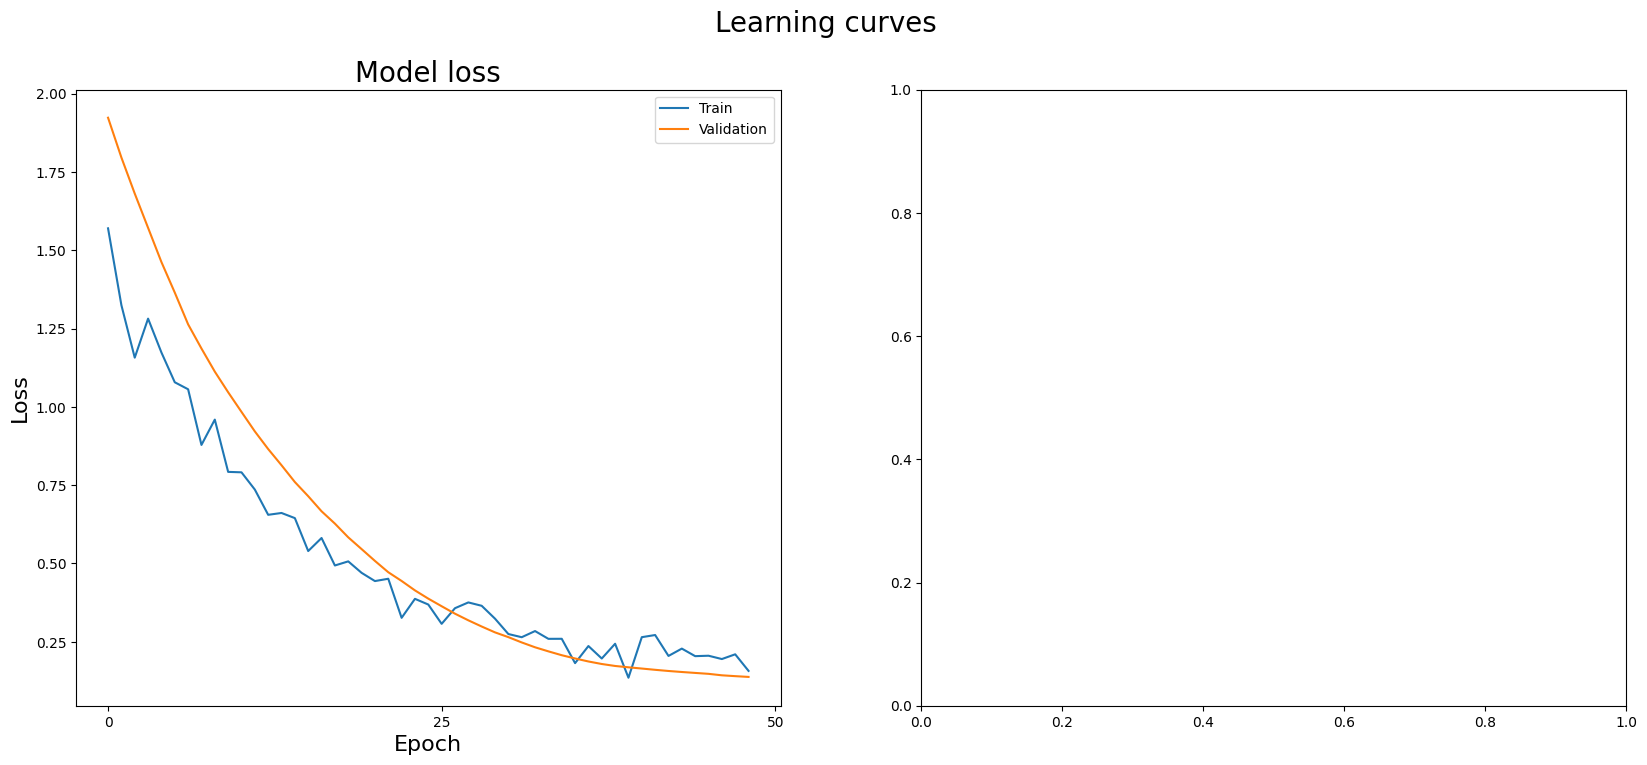

In [25]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize = (20, 8))

ax1.plot(history.history['loss'][1:])
ax1.plot(history.history['val_loss'][1:])
ax1.set_title('Model loss', size=20)
ax1.set_ylabel('Loss', size=16)
ax1.set_xlabel('Epoch', size=16)
ax1.set_xticks(range(0, epochs+1, 25))
ax1.legend(['Train', 'Validation'], loc='upper right')
fig.suptitle('Learning curves', size=20)

plt.show()

In [26]:
pca = PCA(n_components=2)
pca.fit(X_train)

PCA(n_components=2)

In [27]:
Xp = pd.DataFrame(pca.transform(X_test))
Xp['pw'] = y_test.tolist()
Xp['preds'] = preds

In [28]:
Xp.head(2)

,0,1,pw,preds
0,-2.145134,-0.088374,-1.196310,-1.168543
1,0.240409,-0.065782,0.378769,0.173624


In [29]:
norm = plt.Normalize(Xp['pw'].min(), Xp['pw'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

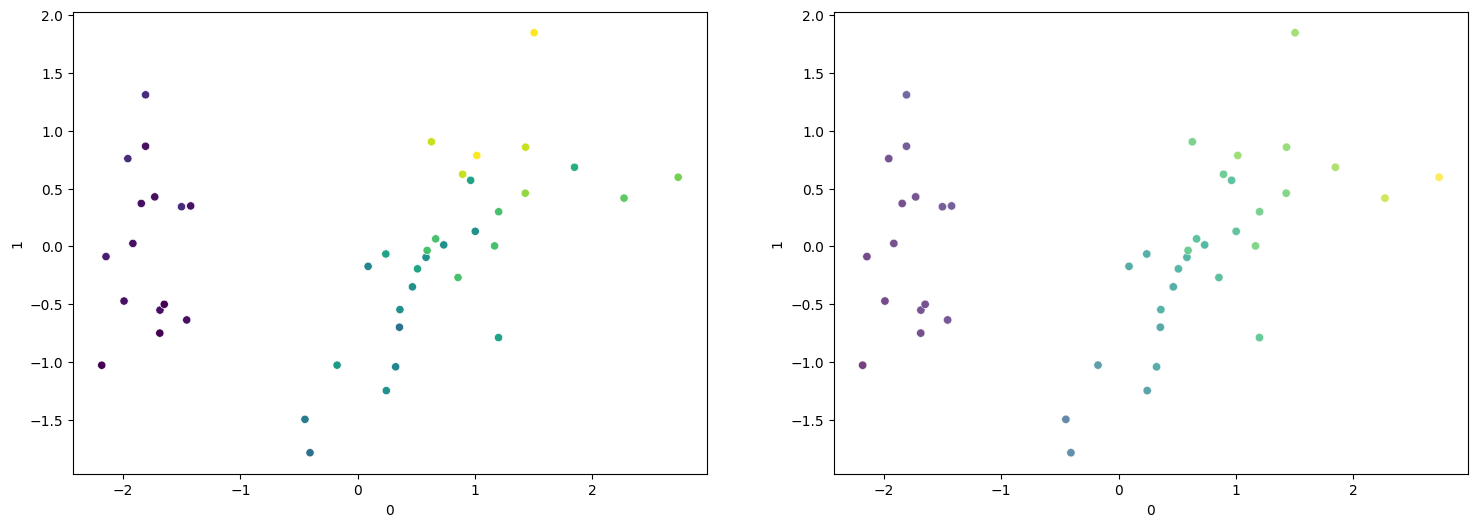

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))
sns.scatterplot(data=Xp, hue='pw', x=0, y=1, alpha=1, palette='viridis',ax=ax1)
sns.scatterplot(data=Xp, hue='preds', x=0, y=1, alpha=0.75, palette='viridis', ax=ax2)
ax1.get_legend().remove()
ax2.get_legend().remove()
ax2.figure.colorbar(sm, label='petal width (target)')
fig.suptitle("Test Set", size=20)
ax1.set_title('Real labels', size=18)
ax2.set_title('Predictions', size=18)
plt.show()

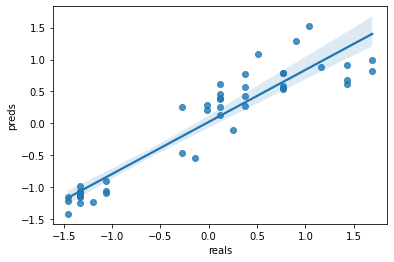

In [ ]:
sns.regplot(x=reals, y=preds)